In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from glob import glob
import os
import astropy.coordinates as coord
from astropy.io import fits, ascii
from astropy.table import Table, Column
import P_Cyg as pc
import scipy.stats

In [2]:
ism = ascii.read("C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Data/ISM_stars/ISM_stars.dat", delimiter = ':')

pdist = 1700
distcut = 1000000

ra = ism["RA"]
dec = ism["DEC"]
dist = ism["Distance"]
pra = coord.Angle((20, 15, 56.53) ,unit='hourangle').deg
pdec = coord.Angle((+37, 52, 35.3) , unit="deg").deg

cygism = ism[ism["Distance"] >= (pdist-distcut)]
cygism = cygism[cygism["Distance"] <= (pdist+distcut)]
foreism = ism[ism["Distance"] < (pdist-distcut)]
backism = ism[ism["Distance"] > (pdist+distcut)]

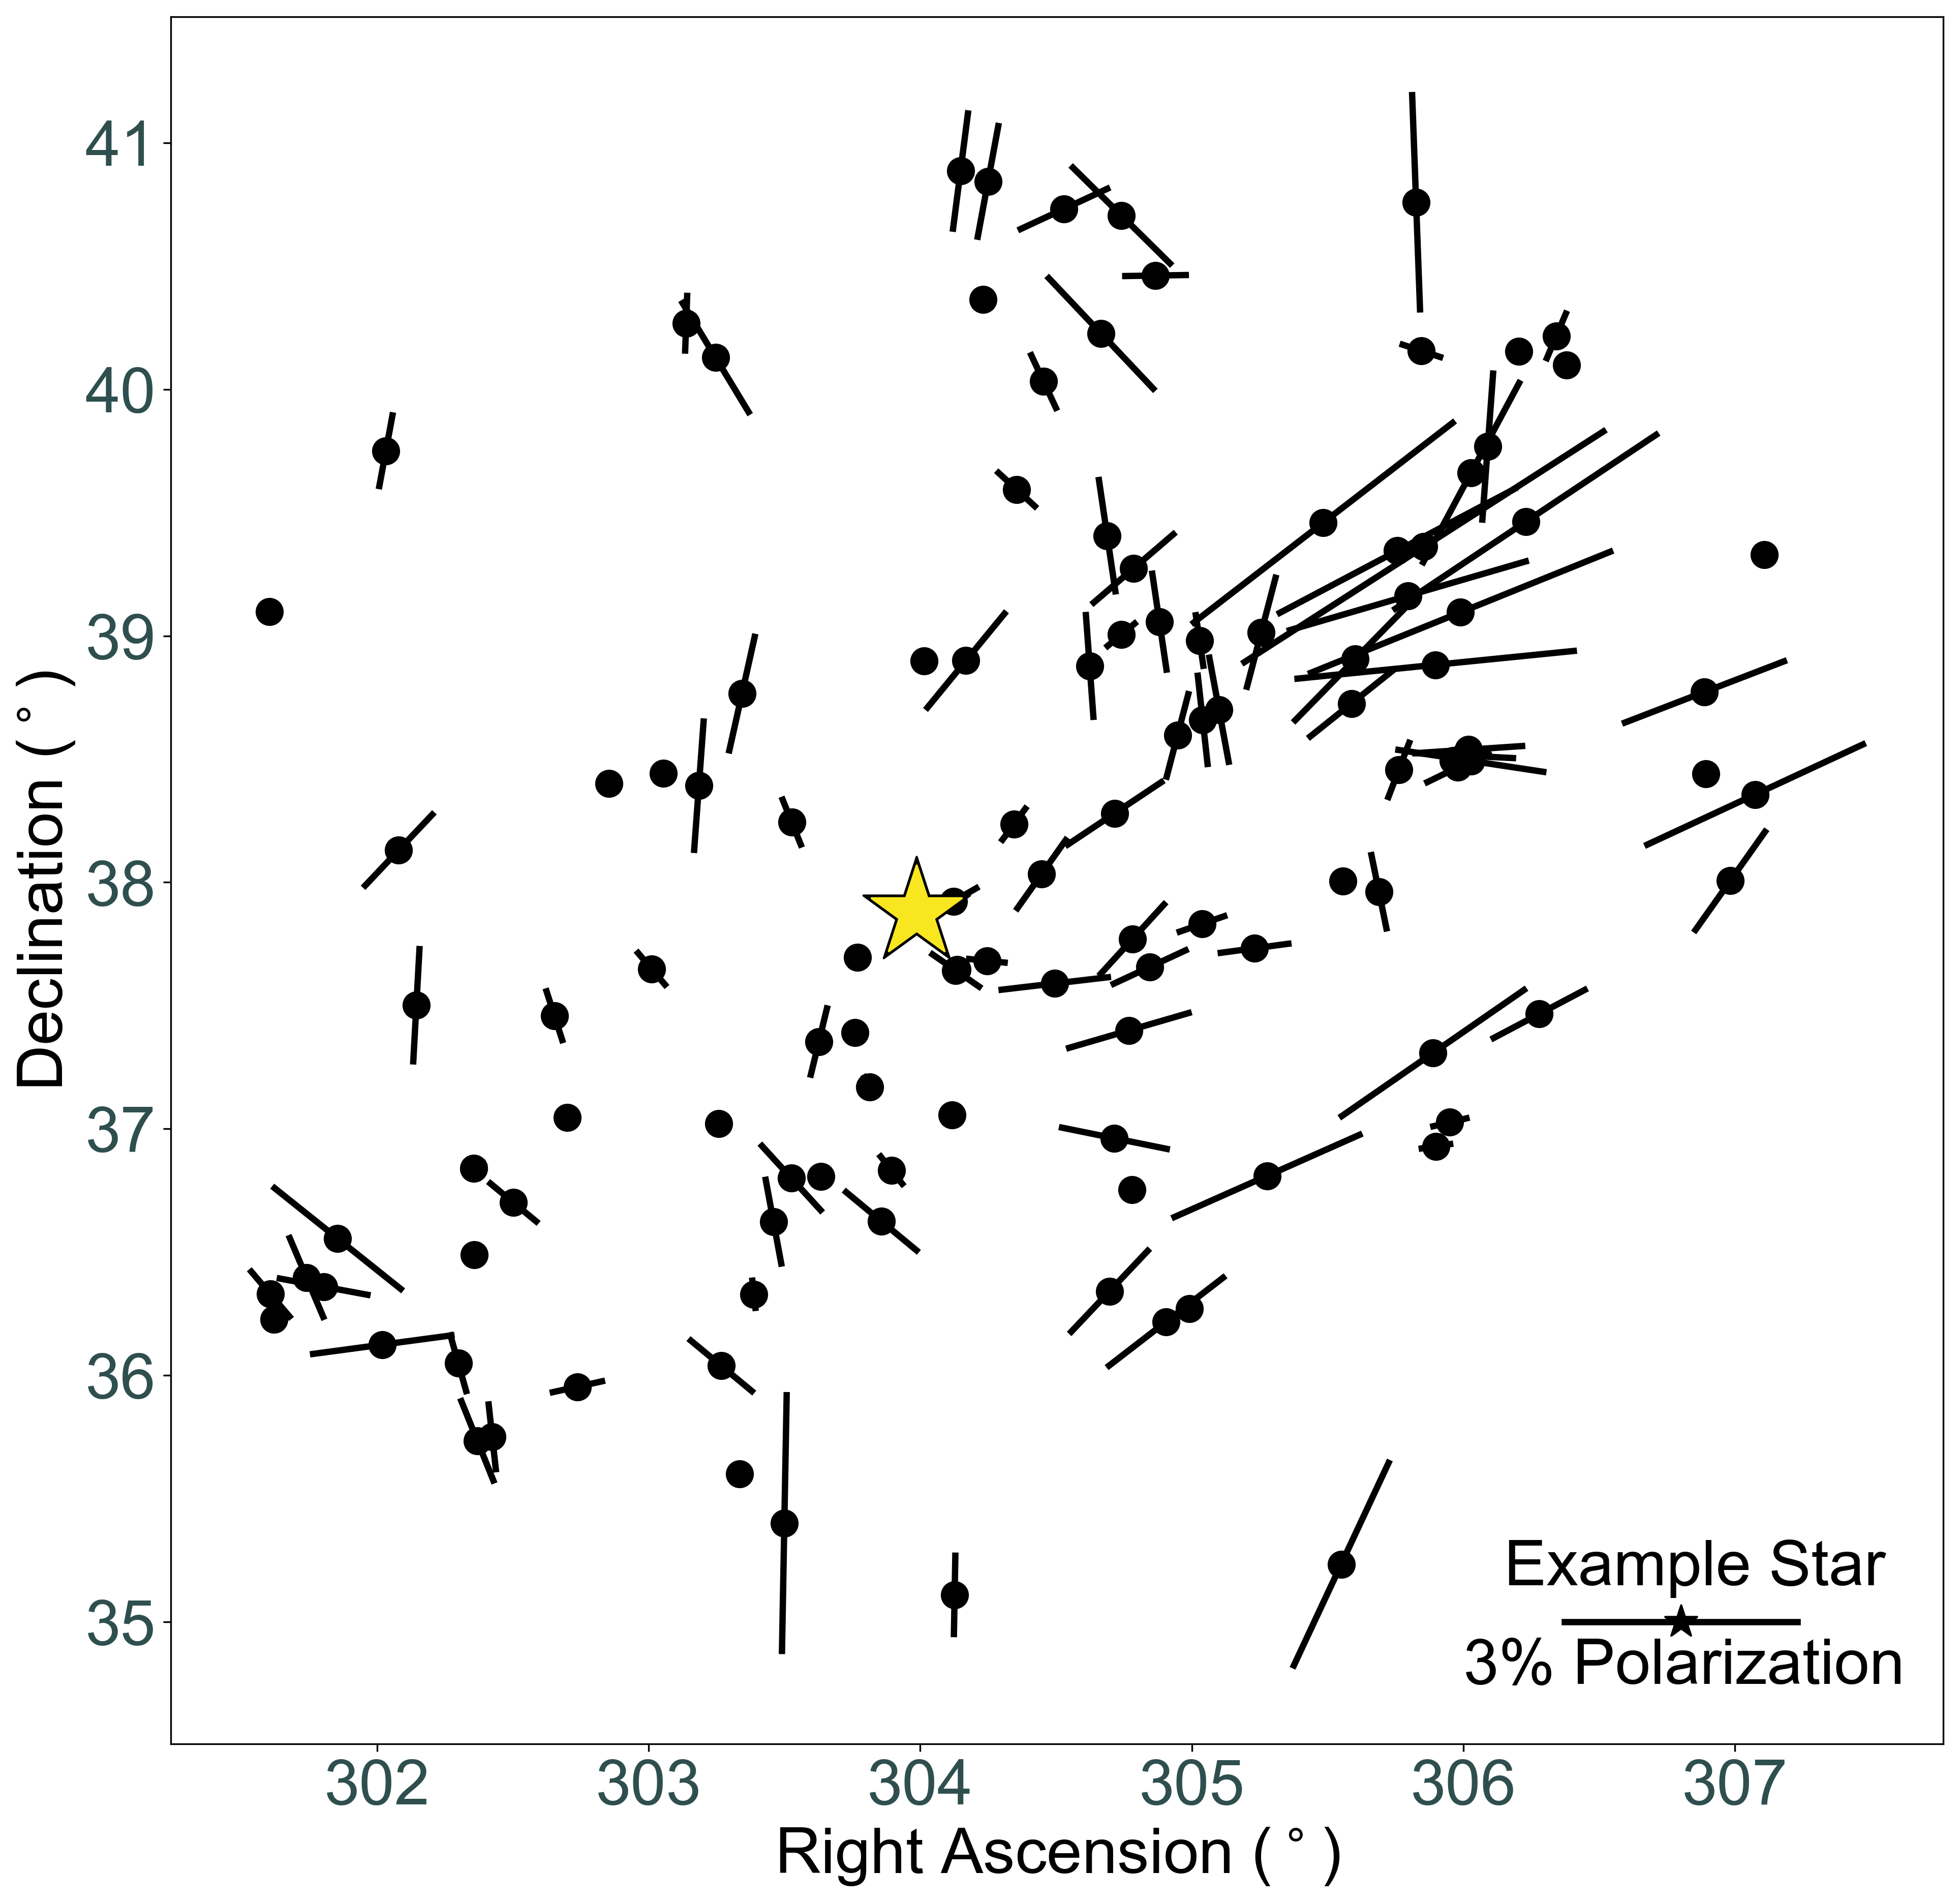

In [27]:
cmap = plt.cm.viridis
fig = plt.figure(figsize=(15,15),dpi=300)
#ax1 = fig.add_subplot(111,projection='mollweide')
ax = plt.gca()
ax.scatter(cygism["RA"],cygism["DEC"],s=150,color='black')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
for r,d,pol,pa in zip(cygism["RA"],cygism["DEC"],cygism['% Pol'],cygism['PA']):
    pc.pol_line(r,d,pol,pa,decstretch= (ylim[1]-ylim[0])/(xlim[1]-xlim[0]),color='black',lw=3)
ax.scatter(306.8,35,s=250,color='black',marker='*')
pc.pol_line(306.8,35,3,90,decstretch= (ylim[1]-ylim[0])/(xlim[1]-xlim[0]),color='black',lw=3)
plt.text(306.15,35.15,"Example Star",fontsize=30,fontname='Arial')
plt.text(306,34.75,"3% Polarization",fontsize=30,fontname="Arial")

ax.scatter(pra,pdec,marker='*',label='P Cygni',s=2800,zorder=9, color='black')
ax.scatter(pra,pdec,marker='*',label='P Cygni',s=2000,zorder=10, color=cmap(0.99))

plt.xticks(fontsize=30, fontname='Arial', color='darkslategrey')
plt.yticks(fontsize=30, fontname='Arial', color='darkslategrey')

ax.set_xlabel(r"Right Ascension ($^\circ$)",size=30,fontname="Arial")
ax.set_ylabel(r"Declination ($^\circ$)",size=30,fontname="Arial")
#ax.annotate(xy=[303.6,38],s="P Cygni")
#ax.set_title("Polarization Map Around P Cygni",size=26,fontname="Garamond")
plt.savefig("C:/Users/Keyan/Desktop/Science/Data/P-Cygni/Figures/Paper_Figures/map.png",overwrite=True,transparent=False)